<a href="https://colab.research.google.com/github/ShreyJais/ML-MSc_AIML/blob/main/2348558_Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#imports
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
#genrating dataset
df = pd.DataFrame(columns=['Age', 'Gender', 'Repeat_Purchase', 'Product_Rating'])

# Generate 5000 rows of random data
for i in range(5000):
    age = random.randint(18, 100)
    gender = random.choice(['Male', 'Female'])
    repeat_purchase = random.choice([True, False])
    product_rating = random.randint(1, 5)
    df.loc[i] = [age, gender, repeat_purchase, product_rating]


In [5]:
df

,Age,Gender,Repeat_Purchase,Product_Rating
0,43,Female,True,1
1,98,Female,True,3
2,41,Female,True,3
3,35,Male,False,5
4,72,Female,True,3
...,...,...,...,...
4995,67,Male,False,2
4996,77,Male,True,2
4997,72,Male,True,1
4998,30,Male,False,2


In [6]:
df.isnull().sum()

Age                0
Gender             0
Repeat_Purchase    0
Product_Rating     0
dtype: int64

In [7]:
df.duplicated().sum()

3400

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1600, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 4975
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1600 non-null   int64 
 1   Gender           1600 non-null   object
 2   Repeat_Purchase  1600 non-null   bool  
 3   Product_Rating   1600 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 51.6+ KB


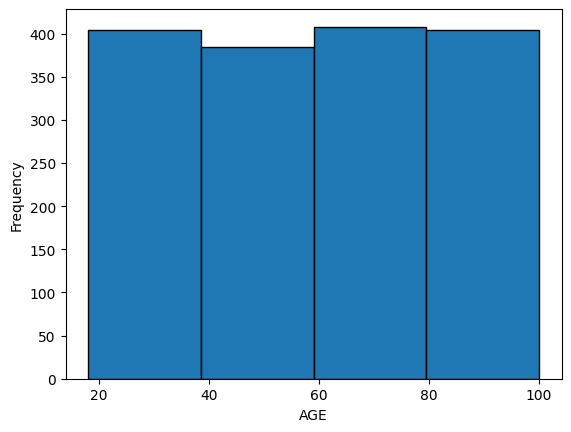

In [11]:
#bining should be done with equal bining size
plt.hist(df.Age, edgecolor="black", bins=4)
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

In [12]:
#Encoding
from sklearn.preprocessing import LabelEncoder
for col in df[["Gender", "Repeat_Purchase"]]:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [13]:
df

,Age,Gender,Repeat_Purchase,Product_Rating
0,43,0,1,1
1,98,0,1,3
2,41,0,1,3
3,35,1,0,5
4,72,0,1,3
...,...,...,...,...
4845,30,0,0,3
4851,43,0,1,3
4875,90,1,0,2
4883,53,1,1,2


In [14]:
#Covariance matrix
df.corr()
#we can see the corralation is very less due to randomise input

,Age,Gender,Repeat_Purchase,Product_Rating
Age,1.000000,0.004465,-0.004824,0.003116
Gender,0.004465,1.000000,0.003747,-0.006629
Repeat_Purchase,-0.004824,0.003747,1.000000,0.003101
Product_Rating,0.003116,-0.006629,0.003101,1.000000


<Axes: >

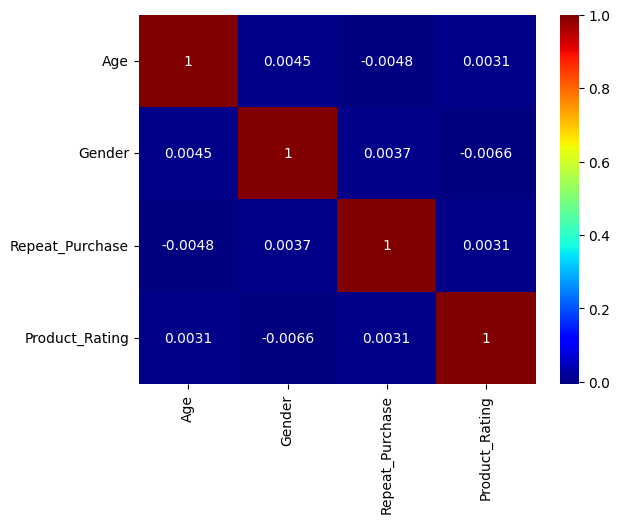

In [15]:
#heat map for Covariance matrix
sb.heatmap(df.corr(),annot=True,cmap='jet')

In [16]:
pd.crosstab(df[['Gender', 'Repeat_Purchase']])

TypeError: ignored

In [17]:
pd.crosstab(df.Gender,df.Repeat_Purchase)

Repeat_Purchase,0,1
Gender,,
0,403,399
1,398,400


In [19]:
# Scince the both are Catogorical varable so we will be using chisquare
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.Gender,df.Repeat_Purchase))
print("Chi-Square:", chi2)  #chi2 directly propostional to association
print("p-value:", p)  #p inversly propostional to association
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)
#we have veryless frequency of the column

Chi-Square: 0.009975093555320443
p-value: 0.9204432544659763
Degrees of Freedom: 1
Expected Frequencies: [[401.50125 400.49875]
 [399.49875 398.50125]]


Here we can see there is no relation

In [20]:
pd.crosstab(df.Product_Rating,df.Repeat_Purchase)

Repeat_Purchase,0,1
Product_Rating,,
1,160,157
2,161,160
3,160,161
4,159,161
5,161,160


In [21]:
df_RP0 = df.where(df.Repeat_Purchase==0).dropna()
df_RP1 = df.where(df.Repeat_Purchase==1).dropna()

In [25]:
df_RP0.Product_Rating
df_RP1.Product_Rating

0       1.0
1       3.0
2       3.0
4       3.0
6       4.0
       ... 
4695    2.0
4705    2.0
4722    2.0
4851    3.0
4883    2.0
Name: Product_Rating, Length: 799, dtype: float64

In [27]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df_RP0.Product_Rating, df_RP1.Product_Rating)
print("T-Statistic:", t_statistic)
print("p-value:", p_value)
#we cant se any relevent data

T-Statistic: -0.1239578445837325
p-value: 0.9013642420888908


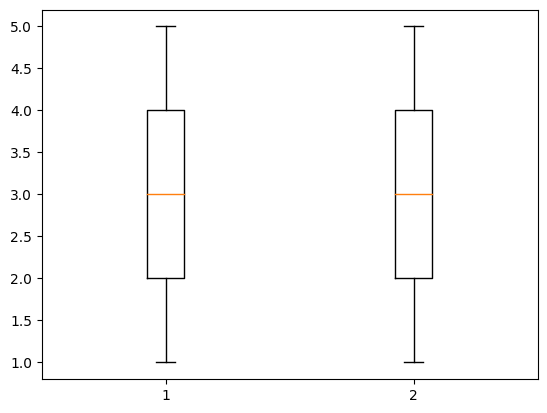

In [38]:
#box plot
data = [df_RP0.Product_Rating, df_RP1.Product_Rating]
plt.boxplot(data)
plt.show()
#there is no diffrence between mean of two data so it showes both as similer